In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.datasets import boston_housing
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
from keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

Boston 주택 가격 예측 모델

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 1us/step
404
102


In [3]:
train_mean = train_data.mean(axis=0)
train_data -= train_mean

train_std = train_data.std(axis=0)
train_data /= train_std

test_mean = test_data.mean(axis=0)
test_data -= test_mean

test_std = test_data.std(axis=0)
test_data /= test_std

In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               7168      
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 256)              

In [10]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/100
13/13 [==============================] - 1s 35ms/step - loss: 565.8845 - mae: 22.3148 - val_loss: 604.6799 - val_mae: 23.0235
Epoch 2/100
13/13 [==============================] - 0s 18ms/step - loss: 536.5551 - mae: 22.1488 - val_loss: 595.0792 - val_mae: 22.9491
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 520.3234 - mae: 21.9979 - val_loss: 589.3309 - val_mae: 22.9242
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 497.9420 - mae: 21.6807 - val_loss: 587.4467 - val_mae: 22.9415
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 493.0995 - mae: 21.5707 - val_loss: 583.1867 - val_mae: 22.9220
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 469.9162 - mae: 21.0628 - val_loss: 577.5869 - val_mae: 22.8864
Epoch 7/100
13/13 [==============================] - 0s 16ms/step - loss: 469.0555 - mae: 21.0681 - val_loss: 573.4938 - val_mae: 22.8118
Epoch 8/100
13/13 [===============

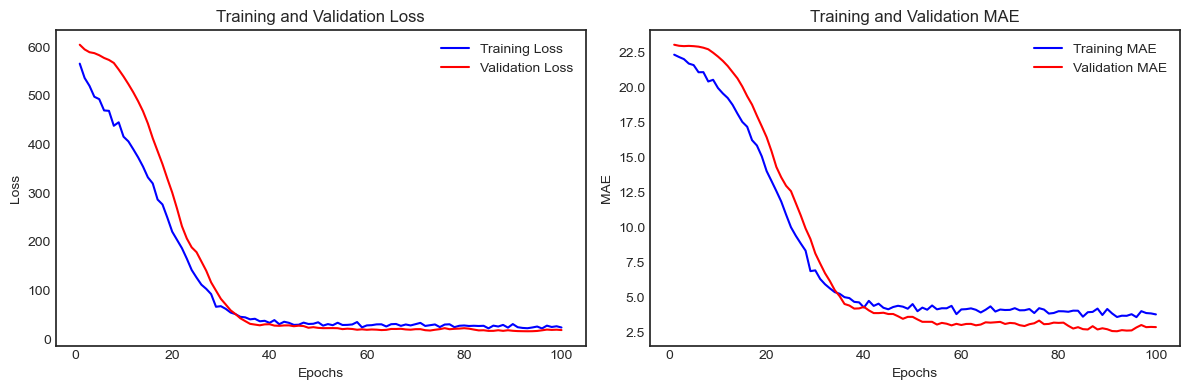

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b-', label='Training MAE')
plt.plot(epochs, val_mae, 'r-', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 10ms/step - loss: 19.3420 - mae: 2.8902


[19.34199333190918, 2.890199661254883]

Reuters 딥러닝 모델

In [29]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [30]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

In [34]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 512)               5120512   
                                                                 
 batch_normalization_20 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 512)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_21 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 256)              

In [37]:
check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_test, y_test),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 3s 16ms/step - loss: 1.3567 - accuracy: 0.7115 - val_loss: 1.2121 - val_accuracy: 0.7364
Epoch 2/60
211/211 [==============================] - 3s 16ms/step - loss: 1.0908 - accuracy: 0.7579 - val_loss: 1.1278 - val_accuracy: 0.7622
Epoch 3/60
211/211 [==============================] - 4s 17ms/step - loss: 0.8916 - accuracy: 0.7988 - val_loss: 1.0862 - val_accuracy: 0.7685
Epoch 4/60
211/211 [==============================] - 3s 16ms/step - loss: 0.7708 - accuracy: 0.8269 - val_loss: 1.0620 - val_accuracy: 0.7720
Epoch 5/60
211/211 [==============================] - 3s 15ms/step - loss: 0.6605 - accuracy: 0.8447 - val_loss: 1.0889 - val_accuracy: 0.7832
Epoch 6/60
211/211 [==============================] - 3s 15ms/step - loss: 0.5902 - accuracy: 0.8594 - val_loss: 1.0916 - val_accuracy: 0.7814
Epoch 7/60
211/211 [==============================] - 3s 16ms/step - loss: 0.5243 - accuracy: 0.8734 - val_loss: 1.0835 - val_accuracy: 0.7867

C:\Users\ZAKAR\AppData\Local\Temp\ipykernel_14572\237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


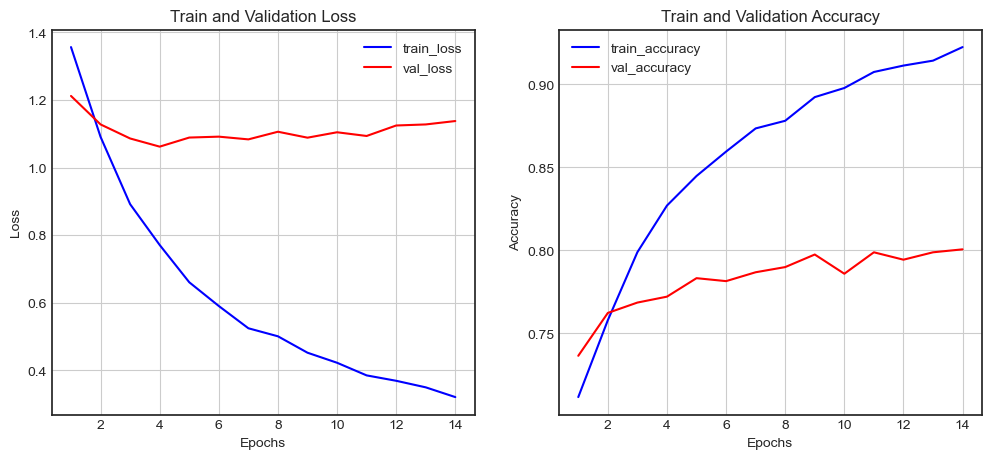

In [38]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [39]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 1s 8ms/step - loss: 1.0620 - accuracy: 0.7720


[1.0619971752166748, 0.7720391750335693]

CIFAR10 딥러닝 모델

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

C:\Users\ZAKAR\AppData\Local\Temp\ipykernel_10204\2984074990.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


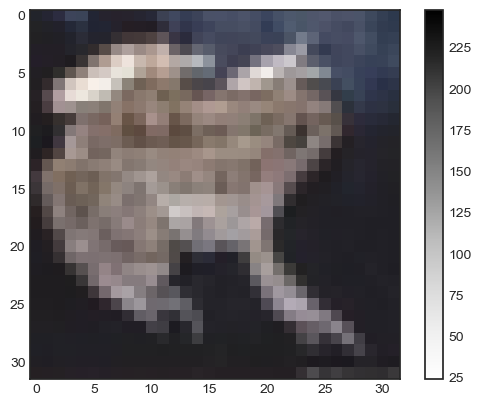

In [6]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
x_train = x_train.reshape(-1, 3072)
x_val = x_val.reshape(-1, 3072)
x_test = x_test.reshape(-1, 3072)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [9]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [10]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [12]:
utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [14]:
checkpoint_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val),
                    callbacks=[checkpoint_callback, early_stopping_callback])

Epoch 1/100
624/625 [============================>.] - ETA: 0s - loss: 2.3223 - accuracy: 0.2155
Epoch 1: val_loss improved from inf to 2.01305, saving model to best_model.h5
625/625 [==============================] - 7s 10ms/step - loss: 2.3218 - accuracy: 0.2157 - val_loss: 2.0131 - val_accuracy: 0.2664
Epoch 2/100
620/625 [============================>.] - ETA: 0s - loss: 1.9452 - accuracy: 0.2899
Epoch 2: val_loss improved from 2.01305 to 1.78696, saving model to best_model.h5
625/625 [==============================] - 6s 10ms/step - loss: 1.9462 - accuracy: 0.2899 - val_loss: 1.7870 - val_accuracy: 0.3539
Epoch 3/100
625/625 [==============================] - ETA: 0s - loss: 1.8961 - accuracy: 0.3122
Epoch 3: val_loss did not improve from 1.78696
625/625 [==============================] - 6s 10ms/step - loss: 1.8961 - accuracy: 0.3122 - val_loss: 1.8981 - val_accuracy: 0.3101
Epoch 4/100
621/625 [============================>.] - ETA: 0s - loss: 1.8999 - accuracy: 0.3111
Epoch 4: 

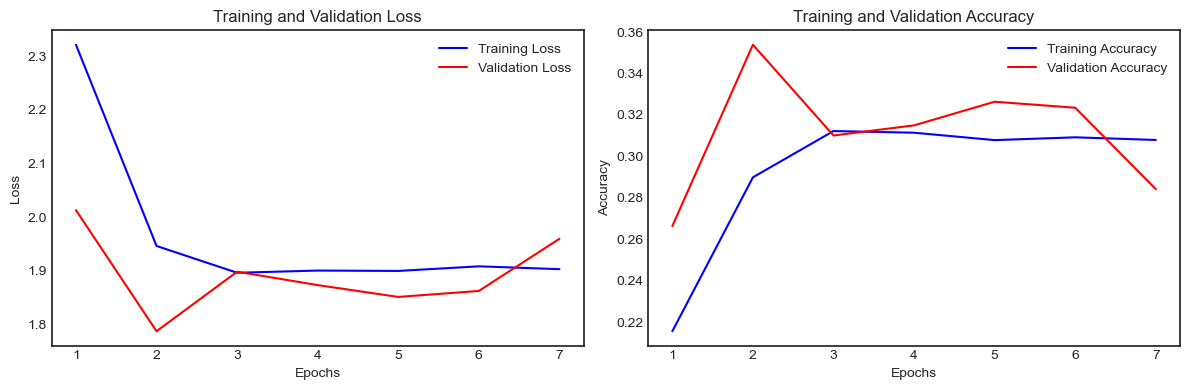

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.9624 - accuracy: 0.2895


[1.9623626470565796, 0.28949999809265137]